# Panorama do COVID-19 no Brasil

O Sars-CoV-2, causador da Covid-19, é um vírus pertencente a família coronavírus que já era conhecida pelos cientistas. Alguns desses familiares provocaram doenças em seres humanos, como o MERS-CoV e o Sars-CoV. Porém não chegaram ao ponto de se disseminar e causar uma pandemia como a que estamos vivenciando agora.

<p align=center>
  <img src="https://www.pfizer.com.br/sites/default/files/inline-images/covid-19_0.jpg" height="300px">
</p>

Esse tipo de vírus é transmitido por meio de gotículas provenientes de tosses e espirros de pessoas infectadas, em uma troca não necessariamente direta.

<center><img alt="Colaboratory logo" width="50%" src="https://www.pfizer.com.br/sites/default/files/inline-images/covid-19_0.jpg"></center>

A doença pode variar de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial da Saúde, cerca de 80% dos pacientes com COVID-19 podem ser assintomáticos ou apresentar poucos sintomas, e aproximadamente 20% podem necessitar de atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

Com o objetivo de esclarecer a atual situação a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos a respeito dessa doença.


## Obtenção dos Dados

Os dados foram obtidos nesse repositório no *Github*: [https://github.com/datasets/covid-19](https://github.com/datasets/covid-19). Esse repositório usa dados mantidos e atualizados diariamente pela equipa da *Johns Hopkins University Center for Systems Science and Engineering*. 

### Dicionário de variáveis

* `Date` - Data em que as informações foram coletadas.
* `Country` - País de onde as informações foram extraídas.
* `Confirmed` - Número de casos confirmados até esse dia.
* `Recovered` - Número de casos recuperados até esse dia.
* `Deaths` - Número de mortes até esse dia.

## Análise Explorátoria dos Dados

Essa análise inicial é crucial para o projeto, pois é nela que iremos analisar, resumir e visualizar os dados presentes no nosso *dataset*.

Primeiramente, vamos importar os pacotes necessários e iniciar nossa análise exploratória.

In [33]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style()
%matplotlib inline

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')

Uma parte importante da análise é verificar a dimensão do nosso *dataset*.

In [34]:
# Ver a dimensão do dataset
print(f'Dimensão do Dataset\n')
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# Verificando as primeira entradas
df.head()

Dimensão do Dataset

Entradas: 76416
Variáveis: 5


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [35]:
# Extrair o nome de cada coluna
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [36]:
# países contidos no dataset
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Também é importante analisarmos o tipo das nossas variáveis, para garantir que eles estão do jeito que queremos.

In [37]:
# Verificar o tipo das variáveis
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

Verificando a distribuição estatística das variáveis.

In [38]:
df.describe()

,Confirmed,Recovered,Deaths
count,7.641600e+04,7.641600e+04,76416.000000
mean,1.691309e+05,1.005628e+05,4431.934543
std,1.024216e+06,5.585348e+05,21710.355733
min,0.000000e+00,0.000000e+00,0.000000
25%,9.400000e+01,1.900000e+01,1.000000
50%,3.265000e+03,1.542500e+03,62.000000
75%,4.532825e+04,2.269800e+04,782.000000
max,2.818857e+07,1.071266e+07,500244.000000


In [39]:
# transformando a coluna Date em datetime
df.Date = pd.to_datetime(df.Date)

Para entender um pouco mais sobre o nosso *dataset*, mais especificamente a data em que começa a coleta de dados.

In [40]:
# Visualizando em que data os dados começaram a ser coletados
print(f'Primeira entrada do Dataset: {df.Date.describe()[4]}')
print(f'última entrada do Dataset: {df.Date.describe()[5]}')

Primeira entrada do Dataset: 2020-01-22 00:00:00
última entrada do Dataset: 2021-02-22 00:00:00


Os dados começaram a ser coletados em 22 de Janeiro de 2020 e se extendem até a presente data.

In [41]:
# verificando dados ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

Deaths       0.0
Recovered    0.0
Confirmed    0.0
Country      0.0
Date         0.0
dtype: float64

Podemos ver que não temos nenhum dado faltante. Isso porque a equipe que mantém o repositório está fazendo um trabalho incrível de limpeza e normalização dos dados. O que torna nossa análise ainda melhor.

### Quais países têm o maior número de casos?

Até o dia 22 de Fevereiro, os países que tem maior número de caso são **Estados Unidos, India, Brasil, Reino Unido** e **Russia**.

In [42]:
df.loc[df.Date == '2021-02-22'].sort_values(by = 'Confirmed', ascending = False).head()

,Date,Country,Confirmed,Recovered,Deaths
71241,2021-02-22,US,28188571,0,500244
31839,2021-02-22,India,11016434,10712665,156463
9551,2021-02-22,Brazil,10195160,9108205,247143
72833,2021-02-22,United Kingdom,4138233,11342,120988
56913,2021-02-22,Russia,4130447,3684955,82255


### Quais países têm o maior número de recuperados?
**India, Brasil, Russia, Turquia** e **Itália** são os países que tiverem o maior número de recuperados.

In [43]:
df.loc[df.Date == '2021-02-22'].sort_values(by = 'Recovered', ascending = False).head()

,Date,Country,Confirmed,Recovered,Deaths
31839,2021-02-22,India,11016434,10712665,156463
9551,2021-02-22,Brazil,10195160,9108205,247143
56913,2021-02-22,Russia,4130447,3684955,82255
70843,2021-02-22,Turkey,2646526,2529450,28138
34227,2021-02-22,Italy,2818863,2334968,95992


### Quais países têm mais mortes?
Os países lideres em mortes são **Estados Unidos, Brazil, Mexico, India** e **Reino Unido**, respectivamente.

In [44]:
df.loc[df.Date == '2021-02-22'].sort_values(by = 'Deaths', ascending = False).head()

,Date,Country,Confirmed,Recovered,Deaths
71241,2021-02-22,US,28188571,0,500244
9551,2021-02-22,Brazil,10195160,9108205,247143
45769,2021-02-22,Mexico,2043632,1602024,180536
31839,2021-02-22,India,11016434,10712665,156463
72833,2021-02-22,United Kingdom,4138233,11342,120988


A tabela acima nos chama atenção. Mesmo o méxico não se destacando nos países com maior número de casos, ele está em terceiro em maior número de mortes. O mesmo acontece com o Brasil, mesmo estando em terceiro na relação de mais casos, em número de mortes ele aparece em segundo. Vamos analisar um pouco mais...

In [45]:
# verificando taxa de mortalidade nos primeiros 3 países

taxa_morte_mexico = (df[(df['Country'] == 'Mexico') & (df['Date'] == '2021-02-22')]['Deaths']) / (df[(df['Country'] == 'Mexico') & (df['Date'] == '2021-02-22')]['Confirmed'])
taxa_morte_us = (df[(df['Country'] == 'US') & (df['Date'] == '2021-02-22')]['Deaths']) / (df[(df['Country'] == 'US') & (df['Date'] == '2021-02-22')]['Confirmed'])
taxa_morte_br = (df[(df['Country'] == 'Brazil') & (df['Date'] == '2021-02-22')]['Deaths']) / (df[(df['Country'] == 'Brazil') & (df['Date'] == '2021-02-22')]['Confirmed'])

print(f'A taxa de morte no México é de: {taxa_morte_mexico.values[0] * 100:.2f}%')
print(f'A taxa de morte nos Estados Unidos é de: {taxa_morte_us.values[0] * 100:.2f}%')
print(f'A taxa de morte no Brasil é de: {taxa_morte_br.values[0] * 100:.2f}%')

A taxa de morte no México é de: 8.83%
A taxa de morte nos Estados Unidos é de: 1.77%
A taxa de morte no Brasil é de: 2.42%


Podemos ver que o México tem uma taxa muito maior de mortalidade do que os países lideres em casos e mortes.

### Gráfico com os 5 países lideres em mortes

Para podermos visualizar melhor esses dados, irá ser plotado um gráfico de barras. Fica muito melhor para comparar os números.

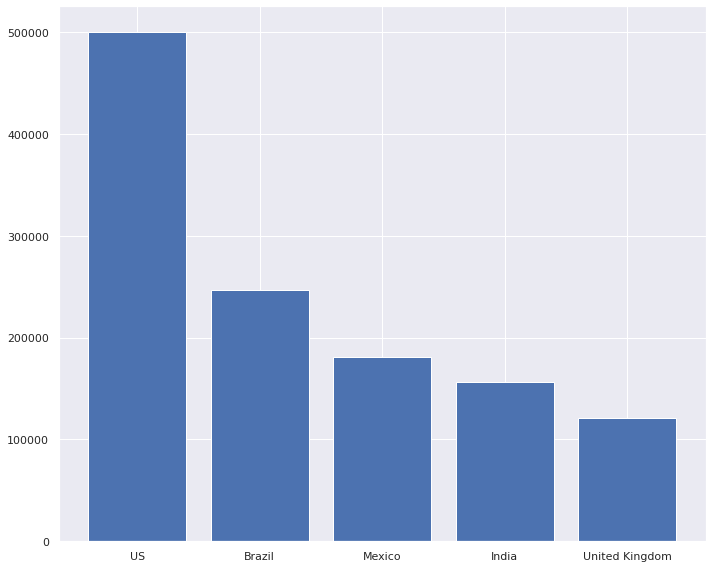

In [46]:
top_5_mortes_totais = df.loc[df['Date'] == '2021-02-22', ['Country', 'Deaths']].sort_values(by = 'Deaths', ascending = False)[0:5]

fig, ax = plt.subplots(figsize = (10, 8))
ax.bar('Country', 'Deaths', data = top_5_mortes_totais)

plt.tight_layout()

## Análise Exploratória para o Brasil

Agora que temos o panorama de como está a COVID-19 no mundo, vamos focar em analisar como está no Brasil.

In [47]:
# criando um DataFrame apenas do Brasil

df_brasil = df.loc[df.Country == 'Brazil'].copy()

# Visualizando as primeiras linhas
df_brasil.head()

,Date,Country,Confirmed,Recovered,Deaths
9154,2020-01-22,Brazil,0,0,0
9155,2020-01-23,Brazil,0,0,0
9156,2020-01-24,Brazil,0,0,0
9157,2020-01-25,Brazil,0,0,0
9158,2020-01-26,Brazil,0,0,0


Novamente vamos ver desde quando os dados referentes ao Brasil começaram a ser coletados.

In [48]:
# Visualizando em que data os dados começaram a ser coletados
print(f'Primeira entrada do Dataset: {df_brasil.Date.describe()[4]}')
print(f'última entrada do Dataset: {df_brasil.Date.describe()[5]}')

Primeira entrada do Dataset: 2020-01-22 00:00:00
última entrada do Dataset: 2021-02-22 00:00:00


### Quando foi confirmado o primeiro caso no Brasil?

In [49]:
# verificando a confirmação do primeiro caso
primeiro_caso = df_brasil[df.Confirmed != 0].head(1)

# obtendo o index do primeiro caso
primeiro_caso.index

Int64Index([9189], dtype='int64')

In [50]:
print(f'O primeiro caso foi confirmado no dia {df_brasil.Date.loc[primeiro_caso.index[0]]}')

O primeiro caso foi confirmado no dia 2020-02-26 00:00:00


### Quando foi confirmada a primeira morte no Brasil?

In [51]:
# verificando a confirmação da primeira morte
primeira_morte = df_brasil[df_brasil.Deaths != 0].head(1)

primeira_morte

,Date,Country,Confirmed,Recovered,Deaths
9209,2020-03-17,Brazil,321,2,1


In [52]:
print(f'A primeira morte aconteceu no dia {df_brasil.Date.loc[primeira_morte.index[0]]}')

A primeira morte aconteceu no dia 2020-03-17 00:00:00


### Quanto tempo levou desde o primeiro caso confirmado até a primeira morte?

Agora que temos a informação de quando foi confirmado o primeiro caso no Brasil e também sabemos quando foi a primeira morte, é interessante responder qual foi o espaço de tempo entre os dois.

In [53]:
# identificar quantos dias levou para identificarmos a primeira morte, em relação ao primeiro caso de COVID-19 registrado.
from datetime import date

data = df_brasil.Date.loc[primeira_morte.index[0]] - df_brasil.Date.loc[primeiro_caso.index[0]]

print(f'Se passaram {data.days} dias entre o primeiro caso e a primeira morte no Brasil.')

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


### Gráfico em escalar linear e logarítmica

* `Escala linear`: A escala linear é a que estamos mais acostumados a ver no cotidiano, essa escala pode ser feita plotando a variável no eixo X e a sua correlata em Y. No nosso caso o eixo X corresponderá aos dias e o Y o número de casos.
* `Escala logarítmica`: A escala logarítmica difere da escala linear, pois ela usará o *log* da grandeza e não a própria grandeza.


Visualizando o total de registros no Brasil, para plotar o gráfico.

In [54]:
print(len(df_brasil['Confirmed']))
print(len(df_brasil['Deaths']))
num_registros = int(len(df_brasil['Confirmed']))

398
398


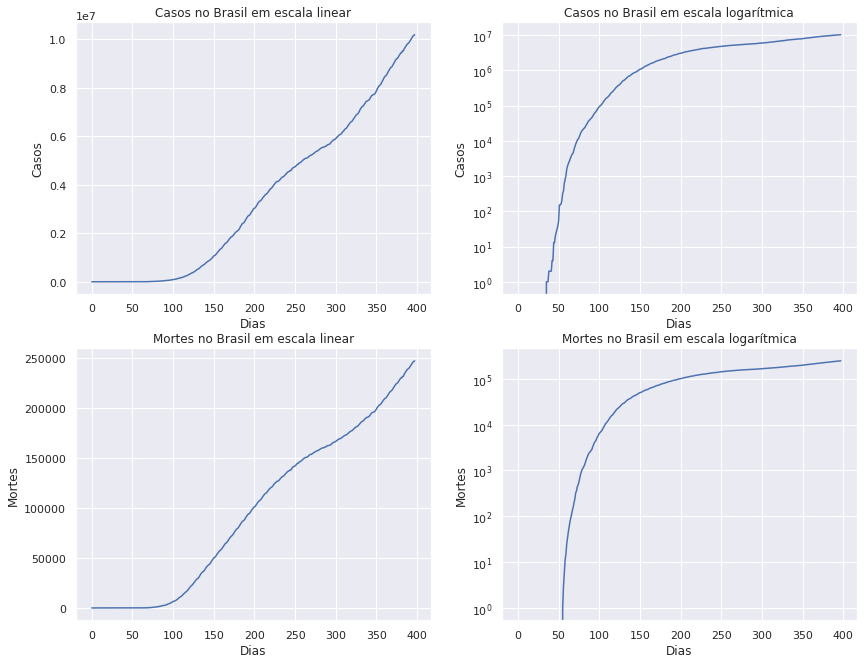

In [55]:
sns.set()

# variáveis que serão usadas para plotar o gráfico
tamanho = list(range(num_registros))
casos = df_brasil['Confirmed']
mortes = df_brasil['Deaths']

# gráfico em escala linear
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 11))
ax1.set_title('Casos no Brasil em escala linear')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(tamanho, casos)

# gráfico em escala logarítmica
ax2.set_title('Casos no Brasil em escala logarítmica')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(tamanho, casos)

# gráfico de mortes no Brasil
ax3.set_title('Mortes no Brasil em escala linear')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(tamanho, mortes)

# gráfico de mortes no Brasil em escala logarítmica
ax4.set_title('Mortes no Brasil em escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(tamanho, mortes);

### Novos casos confirmados e mortes por dia.
Para isso criei uma função que pega o número de pessoas confirmadas de um dia e subtrai pelo número de confirmados do dia anterior, resultando no número de novos casos naquele dia em relação ao anterior.

In [56]:
# inserindo nova coluna 'cases_per_day' no nosso DataFrame do Brasil, iniciando com valor 0
df_brasil.insert(5, 'cases_per_day', 0)

# resetando os indices do DataFrame, ele vai criar uma coluna chamada index. Iremos remover ela, já que não será usada
df_brasil = df_brasil.reset_index()
df_brasil = df_brasil.drop('index', axis = 1)

def create_df_cases(df):
  tamanho_df = int(len(df))

  for i in range(1, tamanho_df):
    dif = df.Confirmed[i] - df.Confirmed[i - 1]
    
    if dif >= 0:
      df['cases_per_day'][i] = dif

    else:
      df['cases_per_day'][i] = 0 

create_df_cases(df_brasil)

De forma análoga a criação da coluna de novos casos, vamos criar a de mortes por dia.

In [57]:
# inserindo coluna 'deaths_per_day' no nosso DataFrame do Brasil iniciando com valor 0 
df_brasil.insert(6, 'deaths_per_day', 0)

def create_df_deaths(df):
  for i in range(1, int(len(df))):
    dif = df.Deaths[i] - df.Deaths[i - 1]

    if dif >= 0:
      df['deaths_per_day'][i] = dif

    else:
      df['deaths_per_day'][i] = 0 

create_df_deaths(df_brasil)

Agora vamos ver como nosso *dataset* está após inserir as colunas

In [58]:
# visualizando as últimas entradas do dataframe
df_brasil.tail()

,Date,Country,Confirmed,Recovered,Deaths,cases_per_day,deaths_per_day
393,2021-02-18,Brazil,10030626,8960755,243457,51879,1367
394,2021-02-19,Brazil,10084208,8988618,244737,53582,1280
395,2021-02-20,Brazil,10139148,9070505,245977,54940,1240
396,2021-02-21,Brazil,10168174,9095692,246504,29026,527
397,2021-02-22,Brazil,10195160,9108205,247143,26986,639


Com essas informações, podemos saber qual a média de novos casos diários e mortes.

### Média de novos casos e mortes.

In [59]:
# variáveis com as medias de mortes e novos casos.
media_de_casos_por_dia = df_brasil.cases_per_day.mean()
media_de_mortes_por_dia = df_brasil.deaths_per_day.mean()

print(f'Média de casos confirmados por dia: {media_de_casos_por_dia:.0f}')
print(f'Média de mortes por dia: {media_de_mortes_por_dia:.0f}')

Média de casos confirmados por dia: 25616
Média de mortes por dia: 621


### Recorde de novos casos e mortes.

In [60]:
print(f'A maior quantidade de novos casos em um dia foi de: {df_brasil.cases_per_day.max()}')
print(f'A maior quantidade de mortes em um dia foi de: {df_brasil.deaths_per_day.max()}')

A maior quantidade de novos casos em um dia foi de: 87843
A maior quantidade de mortes em um dia foi de: 1986


### Gráfico de novos casos confirmados e mortes no Brasil.

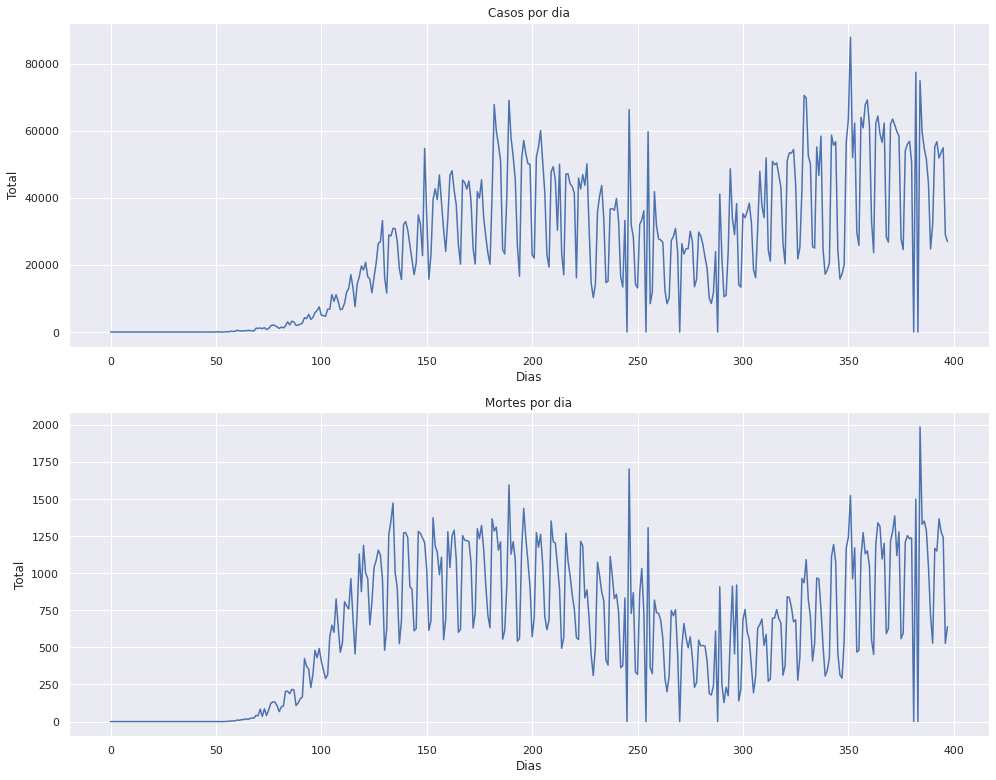

In [61]:
cases_per_day = df_brasil['cases_per_day']
deaths_per_day = df_brasil['deaths_per_day']

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 11))

ax1.set_title("Casos por dia")
ax1.set_ylabel("Total")
ax1.set_xlabel("Dias")
ax1.plot(tamanho, cases_per_day)

ax2.set_title("Mortes por dia")
ax2.set_ylabel("Total")
ax2.set_xlabel("Dias")
ax2.plot(tamanho, deaths_per_day)


plt.tight_layout()

A primeira vista, podemos perceber que a curva de novos casos e mortes é muito parecida, mesmo estando em escalas diferentes, ou seja, pode existir uma correlação entre essas variáveis, vamos averiguar.

### Correlação entre novos casos e mortes
Não confunda correlação com causa. Correlação quer dizer que as duas variáveis estão relacionadas e não que uma é a causa da outra.

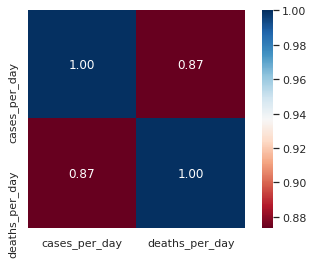

In [62]:
# criando matriz de correlação
corr = df_brasil[['cases_per_day', 'deaths_per_day']].corr()

# plotando o heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

## Conclusão

Um detalhe sobre esse conjunto de dados é que ele é atualizado diariamente, ou seja, em alguns dias, as informações presentes aqui podem estar desatualizadas.

Contudo, com a análise desses dados, podemos destacar alguns pontos:
* Os Estados Unidos lideram em casos e mortes.
* México, mesmo não estando entre os 5 primeiros em número de casos, está em terceiro no número de mortes e tem a maior taxa de mortalidade entre os 3 primeiros.
* Nota-se uma forte crelação entre novos casos e mortes.
* Casos e mortes continuam em uma crescente, no Brasil e no mundo. O que influciará se os números irão continuar crescendo são as políticas públicas de cada país.

No mais, lavem as mãos, usem álcool em gel, máscara e evitem aglomerações.